# Ventas Centro Comercial

La base de datos Centro Comercial es un caso clásico de registro de facturas de compra por parte de los puntos de atención. Allí se solicitan los datos de los clientes compradores a partir de facturas superiores a 50 mil pesos. El objetivo es poder caracterizar los clientes e identificar los establecimientos de mayor y menor desempeño en función de la afluencia de clientes que visitan sus tiendas. Se espera mediante un análisis descriptivo y exploratorio proponer una segmentación de almacenes y clientes y proponer estrategias de fidelización.

### Importar librerías

In [104]:
import pandas as pd
import numpy as np 
import seaborn as sns

sns.set_theme()

### Leer los datos

In [2]:
df = pd.read_excel('Caso 04 - Ventas en Centro Comercial.xlsx', sheet_name='bd')

In [3]:
df.head(3)

,Cedula,Nombre Completo,nCodigoTransaccion,nCodigoConsumidor,Almacen,Categoria,nVenta,nItem,sEmail,Ciudad,...,EDAD,RECENCIA DIAS,Dirección,MailValido,CelValid,TelefonoMovil,TelOfcValid,TelefonoOficina,TelCasaValid,TelefonoCasa
0,1,NOMBRE APELLIDO 1,29344936,6700170,Escape,Moda Masculina y Femenina,203000,1,NaN,SABANETA,...,19,15,NaN,No,Si,NaN,No,NaN,Si,NaN
1,2,NOMBRE APELLIDO 2,31924314,2357373,Bon Bonite,Calzado y Bolsos,284000,1,NaN,MEDELLIN,...,40,3,NaN,No,Si,NaN,No,NaN,Si,NaN
2,3,NOMBRE APELLIDO 3,31924315,2357373,Velez,Calzado y Bolsos,324000,1,NaN,MEDELLIN,...,40,3,NaN,No,Si,NaN,No,NaN,Si,NaN


In [4]:
df.tail(3)

,Cedula,Nombre Completo,nCodigoTransaccion,nCodigoConsumidor,Almacen,Categoria,nVenta,nItem,sEmail,Ciudad,...,EDAD,RECENCIA DIAS,Dirección,MailValido,CelValid,TelefonoMovil,TelOfcValid,TelefonoOficina,TelCasaValid,TelefonoCasa
112949,112950,NOMBRE APELLIDO 112950,26746717,6355246,Saldos De Exportación,Moda Masculina y Femenina,5000,1,NaN,MEDELLIN,...,13,23,NaN,No,Si,NaN,Si,NaN,Si,NaN
112950,112951,NOMBRE APELLIDO 112951,31386254,6355246,Calzado Goysa,Calzado y Bolsos,60000,1,NaN,MEDELLIN,...,13,9,NaN,No,Si,NaN,Si,NaN,Si,NaN
112951,112952,NOMBRE APELLIDO 112952,31577681,7060684,Monas Y Morenas,Moda Femenina,50000,1,NaN,MEDELLIN,...,22,7,NaN,Si,Si,NaN,No,NaN,Si,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112952 entries, 0 to 112951
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Cedula              112952 non-null  int64  
 1   Nombre Completo     112952 non-null  object 
 2   nCodigoTransaccion  112952 non-null  int64  
 3   nCodigoConsumidor   112952 non-null  int64  
 4   Almacen             112952 non-null  object 
 5   Categoria           112952 non-null  object 
 6   nVenta              112952 non-null  int64  
 7   nItem               112952 non-null  int64  
 8   sEmail              0 non-null       float64
 9   Ciudad              112952 non-null  object 
 10  nCodigoGenero       112952 non-null  object 
 11  nCodigoEstadoCivil  112952 non-null  object 
 12  ANO                 112952 non-null  int64  
 13  MES                 112952 non-null  object 
 14  DIA                 112952 non-null  int64  
 15  DIASEMANA           112952 non-nul

In [7]:
df['nCodigoConsumidor'] = df['nCodigoConsumidor'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112952 entries, 0 to 112951
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Cedula              112952 non-null  int64  
 1   Nombre Completo     112952 non-null  object 
 2   nCodigoTransaccion  112952 non-null  int64  
 3   nCodigoConsumidor   112952 non-null  object 
 4   Almacen             112952 non-null  object 
 5   Categoria           112952 non-null  object 
 6   nVenta              112952 non-null  int64  
 7   nItem               112952 non-null  int64  
 8   sEmail              0 non-null       float64
 9   Ciudad              112952 non-null  object 
 10  nCodigoGenero       112952 non-null  object 
 11  nCodigoEstadoCivil  112952 non-null  object 
 12  ANO                 112952 non-null  int64  
 13  MES                 112952 non-null  object 
 14  DIA                 112952 non-null  int64  
 15  DIASEMANA           112952 non-nul

### Realizar el histograma del valor de la factura 'nVenta'

array([[<AxesSubplot:title={'center':'nVenta'}>]], dtype=object)

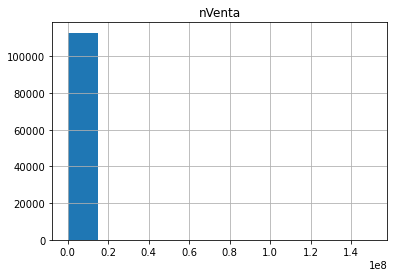

In [9]:
df.hist(column='nVenta')

In [10]:
mask = df['nVenta'] < 1000000

In [11]:
mask

0         True
1         True
2         True
3         True
4         True
          ... 
112947    True
112948    True
112949    True
112950    True
112951    True
Name: nVenta, Length: 112952, dtype: bool

In [12]:
df_2 = df[mask]

In [ ]:
df_2 = df[df['nVenta'] < 1000000]

<AxesSubplot:>

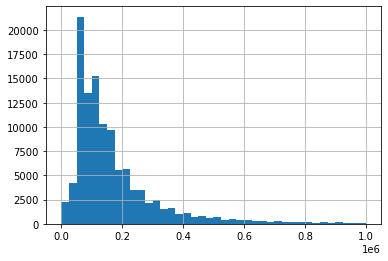

In [13]:
df_2['nVenta'].hist(bins=40)

array([[<AxesSubplot:title={'center':'nVenta'}>]], dtype=object)

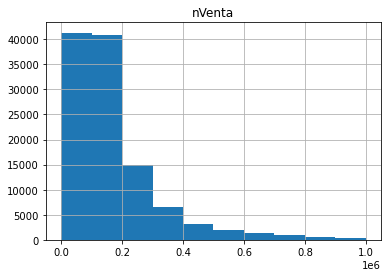

In [14]:
df_2.hist(column='nVenta')

### Calcular la media, mediana y desviación estándar del valor de las facturas

A continuacións e mostrara el promedio de las facturas del mes de agosto

In [47]:
df_2['MES'].unique()

array(['Diciembre', 'Noviembre', 'Abril', 'Marzo', 'Enero', 'Septiembre',
       'Agosto', 'Octubre', 'Febrero', 'Junio', 'Julio', 'Mayo'],
      dtype=object)

In [48]:
agosto = df_2[df_2['MES']=='Agosto']

In [83]:
agosto

,Cedula,Nombre Completo,nCodigoTransaccion,nCodigoConsumidor,Almacen,Categoria,nVenta,nItem,sEmail,Ciudad,...,RECENCIA DIAS,Dirección,MailValido,CelValid,TelefonoMovil,TelOfcValid,TelefonoOficina,TelCasaValid,TelefonoCasa,fecha
20,21,NOMBRE APELLIDO 21,31537050,6536407,Piel De Verano,Moda Femenina,200000,1,NaN,MEDELLIN,...,7,NaN,No,Si,NaN,No,NaN,Si,NaN,2010-08-11
39,40,NOMBRE APELLIDO 40,27475161,6508701,Stop,Moda Femenina,844000,1,NaN,MEDELLIN,...,19,NaN,No,No,NaN,Si,NaN,Si,NaN,2009-08-21
98,99,NOMBRE APELLIDO 99,24931599,6114318,Piel De Verano,Moda Femenina,69900,1,NaN,MEDELLIN,...,31,NaN,No,No,NaN,No,NaN,Si,NaN,2008-08-08
99,100,NOMBRE APELLIDO 100,24931600,6114318,Piel De Verano,Moda Femenina,69900,1,NaN,MEDELLIN,...,31,NaN,No,No,NaN,No,NaN,Si,NaN,2008-08-08
121,122,NOMBRE APELLIDO 122,24973261,6122696,Nueve Lunas,Moda Femenina,142700,1,NaN,MEDELLIN,...,31,NaN,No,No,NaN,No,NaN,Si,NaN,2008-08-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112910,112911,NOMBRE APELLIDO 112911,24962811,6120208,Vibraciones,Moda Masculina y Femenina,126000,1,NaN,MEDELLIN,...,31,NaN,No,Si,NaN,No,NaN,Si,NaN,2008-08-19
112912,112913,NOMBRE APELLIDO 112913,27496810,6513066,Monas Y Morenas,Moda Femenina,63000,1,NaN,MEDELLIN,...,19,NaN,No,Si,NaN,No,NaN,Si,NaN,2009-08-29
112937,112938,NOMBRE APELLIDO 112938,27450991,6387637,Pagos Internacionales,Sector Financiero,30000,1,NaN,BELLO,...,19,NaN,No,Si,NaN,No,NaN,Si,NaN,2009-08-18
112943,112944,NOMBRE APELLIDO 112944,27469221,6507364,Yoyo,Moda Infantil,125000,1,NaN,MEDELLIN,...,19,NaN,No,No,NaN,No,NaN,Si,NaN,2009-08-19


In [50]:
promedio_agosto = agosto['nVenta'].mean()

In [51]:
print('El promedio de agsoto es {}'.format(promedio_agosto))

El promedio de agsoto es 157160.31743144937


In [52]:
mediana_agosto = agosto['nVenta'].median()
print('La mediana de agsoto es {}'.format(mediana_agosto))

La mediana de agsoto es 113000.0


In [53]:
desviación_agosto = agosto['nVenta'].std()
print('La desviación de agsoto es {}'.format(desviación_agosto))

La desviación de agsoto es 141341.59371637373


### Identificar día y mes que mas se registran facturas (moda)

In [55]:
df_2['MES'].mode()

0    Diciembre
dtype: object

In [56]:
df_2['MES'].value_counts()

Diciembre     28201
Noviembre     11306
Septiembre     9412
Octubre        9259
Enero          7968
Marzo          7274
Agosto         7148
Mayo           6686
Junio          6644
Febrero        6443
Julio          6340
Abril          4966
Name: MES, dtype: int64

In [95]:
df_2.groupby('MES').count()['Almacen'].sort_values(ascending=False)

MES
Diciembre     28201
Noviembre     11306
Septiembre     9412
Octubre        9259
Enero          7968
Marzo          7274
Agosto         7148
Mayo           6686
Junio          6644
Febrero        6443
Julio          6340
Abril          4966
Name: Almacen, dtype: int64

In [60]:
df_2['DIA'].value_counts()

23    4280
24    4194
22    4083
29    4044
28    4036
19    3956
4     3948
5     3936
30    3885
26    3832
18    3782
16    3781
9     3719
17    3694
2     3658
6     3655
27    3596
21    3591
3     3576
15    3512
13    3490
14    3459
11    3454
12    3436
20    3374
10    3350
7     3337
8     3065
25    2954
1     2606
31    2364
Name: DIA, dtype: int64

### Mostrar en un gráfico de barras la cantidad de facturas registradas por hombres y mujeres

In [15]:
df_2.columns

Index(['Cedula', 'Nombre Completo', 'nCodigoTransaccion', 'nCodigoConsumidor',
       'Almacen', 'Categoria', 'nVenta', 'nItem', 'sEmail', 'Ciudad',
       'nCodigoGenero', 'nCodigoEstadoCivil', 'ANO', 'MES', 'DIA', 'DIASEMANA',
       'ANOMES', 'ANOMESDIA', 'SEMESTRE', 'VentasMM', 'SEMESTREDIG', 'ANONCTO',
       'MESNCTO', 'DIANCTO', 'DIASEMANANCTO', 'ANOMESNCTO', 'ANOMESDIANCTO',
       'EDAD', 'RECENCIA DIAS', 'Dirección', 'MailValido', 'CelValid',
       'TelefonoMovil', 'TelOfcValid', 'TelefonoOficina', 'TelCasaValid',
       'TelefonoCasa'],
      dtype='object')

In [20]:
df_2.groupby('nCodigoGenero').count()['nVenta']

nCodigoGenero
Hombre    18994
Mujer     92653
Name: nVenta, dtype: int64

### Cantidad de facturas registradas por cada almacen

In [119]:
#Cuenta de facturas
almacenes_top_facturas = df_2.groupby('Almacen').count()['nVenta'].sort_values(ascending=False)[0:10]
almacenes_top_facturas

Almacen
Chalis Balenciaga    8896
Calzado Goysa        7210
Bon Bonite           7041
Vibraciones          5603
Chalis Sport         5438
Stop                 5069
Spring Step          4284
Chicos Y Chicas      4150
Vamos                4059
Monas Y Morenas      3732
Name: nVenta, dtype: int64

In [54]:
agosto = df_2[df_2['MES']=='Agosto']

In [65]:
df_2.groupby(['MES','DIA'])['nVenta'].sum().sort_values(ascending=True)[:30]

MES        DIA
Marzo      22      6314000
Mayo       25      6836000
           1       9460000
Abril      6       9737000
           11      9863700
Febrero    20     10366700
Abril      5      10454000
Agosto     17     11283000
Junio      30     11433200
Abril      9      11434000
           12     12387400
Junio      29     13130000
           22     13944000
Octubre    12     14570436
Noviembre  2      14811000
Mayo       17     15462893
Junio      15     15657000
Julio      5      15924800
           6      17365700
Abril      3      17576900
Mayo       11     18365700
           26     18551000
Noviembre  1      18555000
Agosto     16     19666350
Enero      10     20185000
Marzo      21     20310800
Junio      8      20451700
Julio      27     20599500
Abril      13     20927900
Enero      11     21153000
Name: nVenta, dtype: int64

In [85]:
# Suma y cuenta total del valor de las facturas por cada almacen
temp = df_2.groupby('Almacen').agg({'nVenta':['sum','count','mean'],'ANOMESDIA':'nunique'})
temp

nVenta                      ANOMESDIA
                      sum count           mean   nunique
Almacen                                                 
120…               350000     2  175000.000000         2
203-             10789000    21  513761.904762        12
213.                30000     1   30000.000000         1
Administracion   25835802   138  187215.956522        71
Artes Y Cia.     24778784   158  156827.746835       127
...                   ...   ...            ...       ...
Vluzy           126547100  1094  115673.765996       393
World Tv         16301999   104  156749.990385        84
Yoyo            203307380  1484  136999.582210       527
Z                 9076000    36  252111.111111        28
Zabas           569193638  2763  206005.659790       462

[126 rows x 4 columns]

In [89]:
temp.sort_values(('nVenta','sum'),ascending=False)

nVenta                      ANOMESDIA
                                      sum count           mean   nunique
Almacen                                                                 
Chalis Balenciaga              2098789461  8896  235925.074303       877
Vibraciones                    1376205639  5603  245619.425129       807
Chalis Sport                   1315241938  5438  241861.334682       857
Bon Bonite                     1288442707  7041  182991.436870       830
Colchones Comodisimos           886748932  2169  408828.461042       682
...                                   ...   ...            ...       ...
Cachibromas                         63000     1   63000.000000         1
Friz Helados                        61000     1   61000.000000         1
Pastel Y Cafê                       55000     1   55000.000000         1
BICICLETAS MILAN LOC. 127-129       53300     1   53300.000000         1
213.                                30000     1   30000.000000         1

[126 rows x 4 columns]